<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notes-about-usage-of-Haar-cascade" data-toc-modified-id="Notes-about-usage-of-Haar-cascade-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notes about usage of Haar cascade</a></span></li></ul></div>

# Face detection

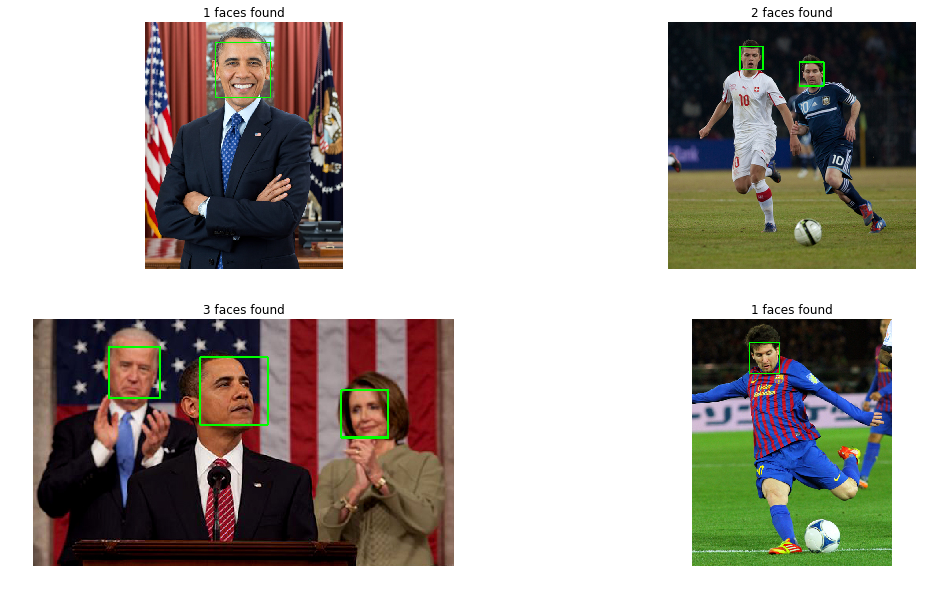

In [25]:
import os
import cv2
import matplotlib.pyplot as plt
from facedetector import FaceDetector

detector = FaceDetector('cascades/haarcascade_frontalface_default.xml')
color = (0, 255, 0)  # color of drawn rectangles: green
thickness = 2  # thickness of drawn rectangles

images = ['images/' + image for image in os.listdir('images')]
fig, axs = plt.subplots(2, 2, squeeze=True, figsize=(18, 10))

for image_path, ax in zip(images, axs.reshape(-1)):
    b, g, r = cv2.split(cv2.imread(image_path))  # use 0 for greyscale image and 1 for colored image
    image = cv2.merge([r, g, b])
    faceRects = detector.detect(image, scaleFactor=1.2)  # returns array of x, y, w, h for each face found
    
    for x, y, w, h in faceRects:
        cv2.rectangle(image, (x, y), (x+w, y+h), color, thickness)
    ax.imshow(image)
    ax.axis('off')
    ax.set_title('{} faces found'.format(len(faceRects)))
plt.show()

## Notes about usage of Haar cascade
- quite fast
- needs parameter fine tuning (scaleFactor, minNeighbors, minSize)
- detects a lot of fale positives (detects faces when there really aren't any